# Train Your Own Model and Serve It With TensorFlow Serving

In this notebook, you will train a neural network to classify images of handwritten digits from the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. You will then save the trained model, and serve it using [TensorFlow Serving](https://www.tensorflow.org/tfx/guide/serving).

**Warning: This notebook is designed to be run in a Google Colab only**.  It installs packages on the system and requires root access. If you want to run it in a local Jupyter notebook, please proceed with caution.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%204%20-%20TensorFlow%20Serving/Week%201/Exercises/TFServing_Week1_Exercise.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/lmoroney/dlaicourse/blob/master/TensorFlow%20Deployment/Course%204%20-%20TensorFlow%20Serving/Week%201/Exercises/TFServing_Week1_Exercise.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

## Setup

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

In [15]:
import os
import json
import tempfile
import requests
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

print("\u2022 Using TensorFlow Version:", tf.__version__)

• Using TensorFlow Version: 2.0.0


## Import the MNIST Dataset

The [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains 70,000 grayscale images of the digits 0 through 9. The images show individual digits at a low resolution (28 by 28 pixels). 

Even though these are really images, we will load them as NumPy arrays and not as binary image objects.

In [7]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
# EXERCISE: Scale the values of the arrays below to be between 0.0 and 1.0.
train_images = train_images / 255.
test_images = test_images / 255.

In the cell below use the `.reshape` method to resize the arrays to the following sizes:

```python
train_images.shape: (60000, 28, 28, 1)
test_images.shape: (10000, 28, 28, 1)
```

In [10]:
# EXERCISE: Reshape the arrays below.
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [11]:
print('\ntrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))


train_images.shape: (60000, 28, 28, 1), of float64
test_images.shape: (10000, 28, 28, 1), of float64


## Look at a Sample Image

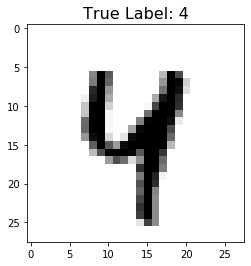

In [12]:
idx = 42
plt.imshow(test_images[idx].reshape(28,28), cmap=plt.cm.binary)
plt.title('True Label: {}'.format(test_labels[idx]), fontdict={'size': 16})
plt.show()

## Build a Model

In the cell below build a `tf.keras.Sequential` model that can be used to classify the images of the MNIST dataset. Feel free to use the simplest possible CNN. Make sure your model has the correct `input_shape` and the correct number of output units.

In [16]:
# EXERCISE: Create a model.
model = keras.Sequential([
  keras.layers.Conv2D(input_shape=(28,28,1), filters=8, kernel_size=3, 
                      strides=2, activation='relu', name='Conv1'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, activation=tf.nn.softmax, name='Softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 13, 13, 8)         80        
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
Softmax (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In the cell below configure your model for training using the `adam` optimizer, `sparse_categorical_crossentropy` as the loss, and `accuracy` for your metrics. Then train the model for the given number of epochs, using the `train_images` array.

In [18]:
# EXERCISE: Configure the model for training.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 5
# EXERCISE: Train the model.
history = model.fit(train_images, train_labels, epochs=epochs)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3712 - accuracy: 0.8962s - loss: 0.3773 - accura
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2164 - accuracy: 0.9384
Epoch 3/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1585 - accuracy: 0.9545
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1218 - accuracy: 0.9651
Epoch 5/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0988 - accuracy: 0.9713


## Evaluate the Model

In [ ]:
# EXERCISE: Evaluate the model on the test images.
results_eval = model.evaluate(test_images, test_labels)

print(results_eval)
# for metric, value in zip(model.metrics_names, results_eval):
#     print(metric + ': {:.3}'.format(value))

## Save the Model

In [22]:
#MODEL_DIR = tempfile.gettempdir()
MODEL_DIR = "saved_model"
version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model\1\assets

export_path = saved_model\1
total 76
drwxr-xr-x 1 fabrice.lacout 1049089     0 Mar  4 14:38 assets
-rw-r--r-- 1 fabrice.lacout 1049089 73376 Mar  4 14:38 saved_model.pb
drwxr-xr-x 1 fabrice.lacout 1049089     0 Mar  4 14:38 variables


## Examine Your Saved Model

In [ ]:
!saved_model_cli show --dir {export_path} --all

## Add TensorFlow Serving Distribution URI as a Package Source

In [ ]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

## Install TensorFlow Serving

In [ ]:
!apt-get install tensorflow-model-server

## Run the TensorFlow Model Server

You will now launch the TensorFlow model server with a bash script. In the cell below use the following parameters when running the TensorFlow model server:

* `rest_api_port`: Use port `8501` for your requests.


* `model_name`: Use `digits_model` as your model name. 


* `model_base_path`: Use the environment variable `MODEL_DIR` defined below as the base path to the saved model.

In [ ]:
!docker run -t --rm -p 8501:8501 \
    -v c:/Users/fabrice.lacout/Desktop/saved_model:/models/mnist \
    -e MODEL_NAME=mnist \
    tensorflow/serving &

In [ ]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
# EXERCISE: Fill in the missing code below.
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port= # YOUR CODE HERE
  --model_name= # YOUR CODE HERE
  --model_base_path= # YOUR CODE HERE

In [ ]:
!tail server.log

## Create JSON Object with Test Images

In the cell below construct a JSON object and use the first three images of the testing set (`test_images`) as your data.

In [26]:
# EXERCISE: Create JSON Object
data = json.dumps({"instances": test_images[0:3].tolist()})

## Make Inference Request

In the cell below, send a predict request as a POST to the server's REST endpoint, and pass it your test data. You should ask the server to give you the latest version of your model.

In [28]:
# EXERCISE: Fill in the code below
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/mnist:predict', data=data, headers=headers)
    
predictions = json.loads(json_response.text)['predictions']
predictions

[[1.21004504e-08,
  2.26925215e-10,
  2.72904072e-06,
  0.000229476951,
  9.63749414e-10,
  4.35795542e-08,
  6.46394559e-13,
  0.999751389,
  6.90608033e-07,
  1.57966533e-05],
 [3.22136402e-05,
  7.293417e-05,
  0.998645723,
  5.55134939e-05,
  3.04430543e-11,
  0.000141786266,
  0.000915514654,
  2.28495743e-13,
  0.000136304589,
  5.71829424e-11],
 [1.21172334e-05,
  0.994644284,
  0.00267995149,
  9.459e-05,
  0.000189309503,
  1.79628296e-05,
  4.14846108e-05,
  0.00198964332,
  0.000314204372,
  1.65066012e-05]]

## Plot Predictions

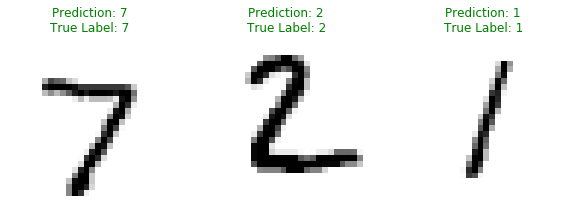

In [29]:
plt.figure(figsize=(10,15))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(test_images[i].reshape(28,28), cmap = plt.cm.binary)
    plt.axis('off')
    color = 'green' if np.argmax(predictions[i]) == test_labels[i] else 'red'
    plt.title('Prediction: {}\nTrue Label: {}'.format(np.argmax(predictions[i]), test_labels[i]), color=color)
    
plt.show()